In [314]:
# Import Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings('ignore')

In [315]:
cols = ['PatientId', 'Age', 'Gender', 'weight', 'Diseases', 'BodyTemperature', 'OxygenLevel',
        'BloodSugar', 'HRV', 'HeartRate', 'Systolic', 'Diasystolic', 'StepCount', 'TimeInBed',
        'RespiratoryRate', 'StressLevel', 'FallAccur', 'BMI']

In [316]:
# Read in data
df = pd.read_excel('SensightPatientsInFlatFile.xlsx',
                   usecols = cols)

df.head()

,PatientId,Age,Gender,weight,Diseases,BodyTemperature,OxygenLevel,BloodSugar,HRV,HeartRate,Systolic,Diasystolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,FallAccur,BMI
0,303,88.00,Female,89.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,386,20.00,Male,66.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,385,21.00,Female,80.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,379,81.00,Male,90.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,376,42.00,Female,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
# Check shape of data
df.shape

(220233, 18)

In [318]:
# Info about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220233 entries, 0 to 220232
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PatientId        220233 non-null  int64  
 1   Age              181770 non-null  float64
 2   Gender           160428 non-null  object 
 3   weight           178932 non-null  float64
 4   Diseases         24323 non-null   object 
 5   BodyTemperature  5198 non-null    float64
 6   OxygenLevel      7309 non-null    float64
 7   BloodSugar       2449 non-null    float64
 8   HRV              6827 non-null    float64
 9   HeartRate        8053 non-null    float64
 10  Systolic         6560 non-null    float64
 11  Diasystolic      6552 non-null    float64
 12  StepCount        6225 non-null    float64
 13  TimeInBed        2179 non-null    float64
 14  RespiratoryRate  4111 non-null    float64
 15  StressLevel      2025 non-null    float64
 16  FallAccur        25517 non-null   floa

In [319]:
# Summary of Statistics for each numerical colum
df.describe()

,PatientId,Age,weight,BodyTemperature,OxygenLevel,BloodSugar,HRV,HeartRate,Systolic,Diasystolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,FallAccur,BMI
count,220233.00,181770.00,178932.00,5198.00,7309.00,2449.00,6827.00,8053.00,6560.00,6552.00,6225.00,2179.00,4111.00,2025.00,25517.00,2120.00
mean,1708.65,267.13,35.29,63.91,95.59,126.89,71.80,76.39,136.97,75.37,4289.74,421.97,2246.15,0.43,1.00,170.94
std,1469.31,624.68,58.81,37.03,23.34,122.03,32.44,30.85,63.81,37.63,4340.52,135.81,134272.29,2.98,0.00,858.21
min,1.00,2.00,0.00,-17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,1.00,0.00
25%,325.00,22.00,0.00,36.00,96.00,105.00,44.00,68.00,115.00,66.00,129.00,331.00,10.00,-1.00,1.00,83.00
50%,633.00,36.00,0.00,39.00,98.00,136.00,72.00,80.00,122.00,72.00,3776.71,420.00,13.00,0.00,1.00,123.00
75%,2997.00,77.00,66.00,100.00,99.00,170.00,95.00,91.00,140.00,79.00,7749.00,507.50,17.00,1.00,1.00,161.00
max,6273.00,2022.00,900.00,1234.00,1234.00,4264.20,1234.00,1234.00,2145.00,1384.00,35000.00,2400.00,8589888.00,100.00,1.00,19669.42


**Outliers will need to be dealt with in the following columns:**
- Age
- Weight
- Body Temperature
- Oxygen Level
- Blood Sugar
- Heart Rate Variability
- Resting Heart Rate
- Systolic BP
- Diastolic BP
- Step Count
- Time in Bed
- Respiratory Rate
- Stress Level
- BMI

In [320]:
# Summary of statistics for each categorical variable
df.describe(include=['object']).T

,count,unique,top,freq
Gender,160428,6,Male,69736
Diseases,24323,38,"Campylobacter Infection., Angina",13300


#### Observations

* 6 unique genders with male being the most with 69,736
* 38 unique diseases

In [321]:
# df.select_dtypes('object').head()

#### Breakdown of Categorical Columns

In [322]:
for i in df.select_dtypes(include = ['object']).columns:
    display(pd.DataFrame(df[i].value_counts()))

,Gender
Male,69736
Female,49027
Other,41555
Gender,55
male,38
female,17


,Diseases
"Campylobacter Infection., Angina",13300
"Campylobacter Infection., Angina, Bipolar disorder",5982
Angina,1794
"UTIs, Angina, Bipolar disorder, Arthritis, Asthma, Chronic obstructive pulmonary disease (COPD)",1561
"Dementia, Depression, Diabetes",597
Bronchitis,149
"Swine flu., Angina, Arthritis, Asthma",136
Cancer,134
"Bronchitis, Angina",122
"Bronchitis, Bipolar disorder",106


In [323]:
numerical_columns = ['Age', 'weight', 'BodyTemperature', 'OxygenLevel', 'BloodSugar', 'HRV', 'HeartRate', 'Systolic', 
                     'Diasystolic', 'StepCount', 'TimeInBed', 'RespiratoryRate', 'StressLevel', 'FallAccur', 'BMI']

In [324]:
# num_df = df[numerical_columns]

In [325]:
# num_df.head()

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns

In [327]:
# for column in num_df.columns:
#    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
#    sns.boxplot(num_df[column])
#    plt.title(f'Boxplot of {column}')
#    plt.ylabel(column)
#    plt.show()

In [328]:
df.isna().sum() / df.shape[0] * 100

PatientId          0.00
Age               17.46
Gender            27.16
weight            18.75
Diseases          88.96
BodyTemperature   97.64
OxygenLevel       96.68
BloodSugar        98.89
HRV               96.90
HeartRate         96.34
Systolic          97.02
Diasystolic       97.02
StepCount         97.17
TimeInBed         99.01
RespiratoryRate   98.13
StressLevel       99.08
FallAccur         88.41
BMI               99.04
dtype: float64

### Condensed Dataframe

#### Choose which columns to use
* Dropping Package Name, Marital Status, Postal Code, Upload Date, Latitude, Longitude

In [329]:
# categorical columns
categorical_columns = ['Gender', 'Diseases']

In [330]:
# avergae of numerical columns grouped by patient id
numerical_df = df.groupby('PatientId')[numerical_columns].mean().reset_index()

In [331]:
# See first 5 rows, each row represents a different patient
numerical_df.head()

,PatientId,Age,weight,BodyTemperature,OxygenLevel,BloodSugar,HRV,HeartRate,Systolic,Diasystolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,FallAccur,BMI
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [332]:
# Create a new condensed dataframe where each row represents a different patient
condensed_df = pd.merge(numerical_df, df[categorical_columns + ['PatientId']].drop_duplicates(), on='PatientId')

In [333]:
# See first five rows (Numerical variables to the left, categorical to the right)
condensed_df.head()

,PatientId,Age,weight,BodyTemperature,OxygenLevel,BloodSugar,HRV,HeartRate,Systolic,Diasystolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,FallAccur,BMI,Gender,Diseases
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [334]:
# Check shape of condensed dataframe
condensed_df.shape

(1280, 18)

In [335]:
# Check info new dataframe
condensed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 0 to 1279
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        1280 non-null   int64  
 1   Age              1084 non-null   float64
 2   weight           569 non-null    float64
 3   BodyTemperature  466 non-null    float64
 4   OxygenLevel      752 non-null    float64
 5   BloodSugar       326 non-null    float64
 6   HRV              738 non-null    float64
 7   HeartRate        769 non-null    float64
 8   Systolic         721 non-null    float64
 9   Diasystolic      721 non-null    float64
 10  StepCount        458 non-null    float64
 11  TimeInBed        330 non-null    float64
 12  RespiratoryRate  680 non-null    float64
 13  StressLevel      446 non-null    float64
 14  FallAccur        303 non-null    float64
 15  BMI              271 non-null    float64
 16  Gender           803 non-null    object 
 17  Diseases      

In [336]:
# Check for null values in each column
condensed_df.isna().sum() / condensed_df.shape[0] * 100.0

PatientId          0.00
Age               15.31
weight            55.55
BodyTemperature   63.59
OxygenLevel       41.25
BloodSugar        74.53
HRV               42.34
HeartRate         39.92
Systolic          43.67
Diasystolic       43.67
StepCount         64.22
TimeInBed         74.22
RespiratoryRate   46.88
StressLevel       65.16
FallAccur         76.33
BMI               78.83
Gender            37.27
Diseases          94.77
dtype: float64

In [337]:
for i in condensed_df.select_dtypes(include = ['object']).columns:
    display(pd.DataFrame(condensed_df[i].value_counts()))

,Gender
Other,457
Male,203
Female,128
male,7
female,7
Gender,1


,Diseases
Bronchitis,5
Hypertension,4
Angina,4
Arthritis,4
"Bronchitis, Bipolar disorder",4
Campylobacter Infection.,4
"Campylobacter Infection., Angina, Bipolar disorder",3
"Stomach Aches, UTIs",3
Cancer,2
Diabetes,2


### Filtered Dataframe

#### Keep only the patients with at least 7 non-null values

In [338]:
filtered_df = condensed_df.dropna(thresh=7)

In [339]:
# See shape of filtered dataframe
filtered_df.shape

(748, 18)

In [340]:
# See first five rows
filtered_df.head()

,PatientId,Age,weight,BodyTemperature,OxygenLevel,BloodSugar,HRV,HeartRate,Systolic,Diasystolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,FallAccur,BMI,Gender,Diseases
11,49,NaN,NaN,NaN,97.50,NaN,85.00,76.50,109.50,69.50,NaN,NaN,13.00,0.00,NaN,NaN,NaN,NaN
23,134,2.00,0.00,35.08,95.67,8.00,113.20,76.94,100.00,100.00,143.06,391.07,13.67,2.00,1.00,NaN,Male,NaN
25,136,90.00,113.38,35.92,96.16,8.08,51.59,84.36,121.61,73.25,4292.04,627.69,15.01,0.47,1.00,11.38,Male,"Campylobacter Infection., Angina"
27,140,63.00,90.00,NaN,96.56,NaN,70.14,70.60,118.22,73.56,1508.00,NaN,12.89,-0.11,NaN,NaN,Gender,NaN
37,162,NaN,NaN,1234.00,1234.00,1233.00,1234.00,388.50,1234.00,1234.00,1234.00,690.00,NaN,NaN,1.00,NaN,NaN,NaN


In [341]:
# Check percentage of each column which is null
filtered_df.isna().sum() / filtered_df.shape[0] * 100.0

PatientId          0.00
Age                2.41
weight            64.71
BodyTemperature   42.25
OxygenLevel        2.41
BloodSugar        56.82
HRV                2.14
HeartRate          2.67
Systolic           3.88
Diasystolic        3.88
StepCount         43.18
TimeInBed         56.28
RespiratoryRate    9.63
StressLevel       40.64
FallAccur         73.13
BMI               64.04
Gender            33.16
Diseases          92.11
dtype: float64

In [342]:
# Check info for filtered dataframe
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 11 to 1279
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        748 non-null    int64  
 1   Age              730 non-null    float64
 2   weight           264 non-null    float64
 3   BodyTemperature  432 non-null    float64
 4   OxygenLevel      730 non-null    float64
 5   BloodSugar       323 non-null    float64
 6   HRV              732 non-null    float64
 7   HeartRate        728 non-null    float64
 8   Systolic         719 non-null    float64
 9   Diasystolic      719 non-null    float64
 10  StepCount        425 non-null    float64
 11  TimeInBed        327 non-null    float64
 12  RespiratoryRate  676 non-null    float64
 13  StressLevel      444 non-null    float64
 14  FallAccur        201 non-null    float64
 15  BMI              269 non-null    float64
 16  Gender           500 non-null    object 
 17  Diseases      

In [343]:
# See the first five rows of numerical column
filtered_df.select_dtypes(['int64', 'float64']).head()

,PatientId,Age,weight,BodyTemperature,OxygenLevel,BloodSugar,HRV,HeartRate,Systolic,Diasystolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,FallAccur,BMI
11,49,NaN,NaN,NaN,97.50,NaN,85.00,76.50,109.50,69.50,NaN,NaN,13.00,0.00,NaN,NaN
23,134,2.00,0.00,35.08,95.67,8.00,113.20,76.94,100.00,100.00,143.06,391.07,13.67,2.00,1.00,NaN
25,136,90.00,113.38,35.92,96.16,8.08,51.59,84.36,121.61,73.25,4292.04,627.69,15.01,0.47,1.00,11.38
27,140,63.00,90.00,NaN,96.56,NaN,70.14,70.60,118.22,73.56,1508.00,NaN,12.89,-0.11,NaN,NaN
37,162,NaN,NaN,1234.00,1234.00,1233.00,1234.00,388.50,1234.00,1234.00,1234.00,690.00,NaN,NaN,1.00,NaN


#### Clean Age Column

In [344]:
# How many null values in the age column?
print("The number of null values in the age column:", filtered_df['Age'].isna().sum())
print("The percentage of null values in the age column:", round(filtered_df['Age'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the age column: 18
The percentage of null values in the age column: 2.41 %


In [345]:
# Check for outliers
filtered_df['Age'].value_counts().sort_index().head()

2.00      3
12.00     1
21.00     1
22.00    36
23.00    15
Name: Age, dtype: int64

In [346]:
filtered_df['Age'].value_counts().sort_index().tail()

88.00        1
90.00        1
100.00       1
123.00     393
2022.00    202
Name: Age, dtype: int64

In [347]:
# Replace values < 20 and > 100 with nulls
filtered_df['Age'] = (
                                    np.where((filtered_df['Age'] < 20) | 
                                    (filtered_df['Age'] > 100), np.nan, filtered_df['Age'])
                                  )

In [348]:
# Check the average age after replacing outliers
mean_age = filtered_df.Age.mean(skipna=True)

mean_age = round(mean_age)

mean_age

36

In [349]:
# Replace null values with average age
filtered_df['Age'].fillna(mean_age, inplace=True)

In [350]:
# Check number of nulls in Age column
filtered_df['Age'].isna().sum()

0

In [351]:
filtered_df['Age'].describe()

count   748.00
mean     36.02
std       8.15
min      21.00
25%      36.00
50%      36.00
75%      36.00
max     100.00
Name: Age, dtype: float64

#### Observations
* Age range between 21 and 100
* Average age of 36 years

<AxesSubplot:xlabel='Age'>

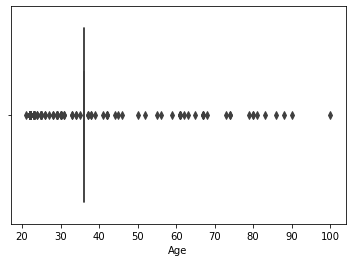

In [352]:
sns.boxplot(filtered_df['Age'])

#### Clean Weight column

In [353]:
# Rename column
filtered_df = filtered_df.rename(columns={'weight': 'Weight'})

In [354]:
# How many null values in the age column?
print("The number of null values in the weight column:", filtered_df['Weight'].isna().sum())
print("The percentage of null values in the weight column:", round(filtered_df['Weight'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the weight column: 484
The percentage of null values in the weight column: 64.71 %


In [355]:
filtered_df['Weight'].value_counts().sort_index().head(10)

0.00     196
5.00       1
22.68      1
23.00      2
39.00      1
40.00      1
50.00      2
51.00      1
51.47      1
51.47      1
Name: Weight, dtype: int64

In [356]:
filtered_df['Weight'].value_counts(dropna=False).sort_index().tail(10)

210.00      1
227.00      1
235.00      1
239.00      1
245.00      1
250.00      2
261.00      1
270.00      1
845.00      1
NaN       484
Name: Weight, dtype: int64

In [357]:
# Replace < 39 kg and > 270 kg with nulls
filtered_df['Weight'] = (
                                    np.where((filtered_df['Weight'] < 39) | 
                                    (filtered_df['Weight'] > 270), np.nan, filtered_df['Weight'])
                                  )

In [358]:
# Median weight after removing outliers
median_weight = filtered_df.Weight.median(skipna=True)

median_weight

83.0

In [359]:
# Replace null values with average weight
filtered_df['Weight'].fillna(median_weight, inplace=True)

In [360]:
# Check number of nulls in weight column
filtered_df['Weight'].isna().sum()

0

In [361]:
filtered_df['Weight'].describe()

count   748.00
mean     85.52
std      21.01
min      39.00
25%      83.00
50%      83.00
75%      83.00
max     270.00
Name: Weight, dtype: float64

#### Observations
- Weight range between 39 kg and 270 kg
- Median weight of 83 kg

<AxesSubplot:xlabel='Weight'>

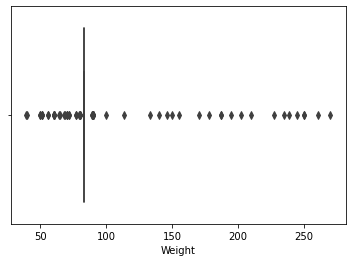

In [362]:
sns.boxplot(filtered_df['Weight'])

#### Clean Body Temperature Column

In [363]:
# How many null values in the age column?
print("The number of null values in the Body Temperature column:", filtered_df['BodyTemperature'].isna().sum())
print("The percentage of null values in the Body Temperature column:", round(filtered_df['BodyTemperature'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the Body Temperature column: 316
The percentage of null values in the Body Temperature column: 42.25 %


In [364]:
# Check for outliers
filtered_df.BodyTemperature.value_counts().sort_index().head(10)

-17.00    1
1.50      1
3.00      1
5.14      1
10.00     1
17.50     1
18.50     1
20.00     1
21.25     1
22.13     1
Name: BodyTemperature, dtype: int64

In [365]:
filtered_df.BodyTemperature.value_counts(dropna=False).sort_index().tail(10)

101.60       1
101.67       1
101.71       1
101.75       3
102.00       3
102.14       1
102.67       1
103.00       1
1234.00      1
NaN        316
Name: BodyTemperature, dtype: int64

In [366]:
# Replace erroneous values with nulls
filtered_df['BodyTemperature'] = (
                                    np.where((filtered_df['BodyTemperature'] < 36) | 
                                    ((filtered_df['BodyTemperature'] >= 41) & (filtered_df['BodyTemperature'] <= 95)) | 
                                    (filtered_df['BodyTemperature'] > 105), np.nan, filtered_df['BodyTemperature'])
                                  )

In [367]:
# Create a function to convert fahrenheit to celsius
def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5/9

In [368]:
# Replace fahrenheit values with celsisus values
filtered_df['BodyTemperature'] = filtered_df['BodyTemperature'].apply(lambda x: fahrenheit_to_celsius(x) if x >= 95 else x)

In [369]:
# Mean body temp after removing outliers
mean_temp = filtered_df['BodyTemperature'].mean(skipna=True)

mean_temp

37.79936471266251

In [370]:
# Fill nulls with 37 (normal body temperature)
filtered_df['BodyTemperature'].fillna(37, inplace=True)

In [371]:
# How many nulls left?
filtered_df['BodyTemperature'].isna().sum()

0

In [372]:
# Statistics of Body Temperature column
filtered_df['BodyTemperature'].describe()

count   748.00
mean     37.36
std       0.67
min      36.00
25%      37.00
50%      37.00
75%      37.87
max      40.58
Name: BodyTemperature, dtype: float64

#### Observations
- Body Temperature range between 36 celsius and 41 celsius
- Median Body Temperature is 37 celsius

<AxesSubplot:xlabel='BodyTemperature'>

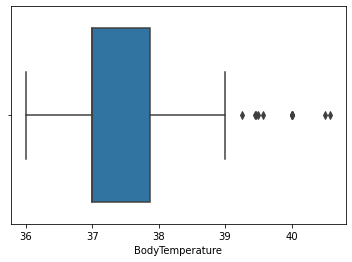

In [373]:
sns.boxplot(filtered_df['BodyTemperature'])

#### Clean Oxygen Level Column

In [374]:
# How many null values in the age column?
print("The number of null values in the Oxygen Level column:", filtered_df['OxygenLevel'].isna().sum())
print("The percentage of null values in the Oxygen Level column:", round(filtered_df['OxygenLevel'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the Oxygen Level column: 18
The percentage of null values in the Oxygen Level column: 2.41 %


In [375]:
filtered_df.OxygenLevel.value_counts().sort_index().head()

5.00     1
6.00     1
10.00    1
21.00    1
22.00    1
Name: OxygenLevel, dtype: int64

In [376]:
filtered_df.OxygenLevel.value_counts().sort_index().tail()

119.88     1
131.85     1
157.25     1
195.75     1
1234.00    1
Name: OxygenLevel, dtype: int64

In [377]:
# Replace values < 90 and > 120 with nulls
filtered_df['OxygenLevel'] = (
                                    np.where((filtered_df['OxygenLevel'] < 90) |
                                    (filtered_df['OxygenLevel'] > 120), np.nan, 
                                    filtered_df['OxygenLevel'])
                                  )

In [378]:
# Median oxygen after removing outliers
median_oxygen = filtered_df['OxygenLevel'].median(skipna=True)

median_oxygen

97.0

In [379]:
# Replace nulls with median oxygen level
filtered_df['OxygenLevel'].fillna(median_oxygen, inplace=True)

In [380]:
# How many nulls left?
filtered_df['OxygenLevel'].isna().sum()

0

In [381]:
# Statistics of Oxygen Level column
filtered_df['OxygenLevel'].describe()

count   748.00
mean     97.49
std       3.13
min      90.09
25%      96.57
50%      97.00
75%      98.00
max     119.88
Name: OxygenLevel, dtype: float64

#### Observations
- Oxygen Level range between 90 and 120
- Median Oxygen level is 97

<AxesSubplot:xlabel='OxygenLevel'>

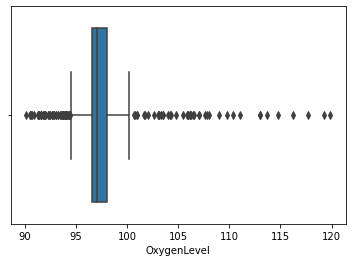

In [382]:
sns.boxplot(filtered_df['OxygenLevel'])

#### Clean Blood Sugar Column

In [383]:
# How many null values in the age column?
print("The number of null values in the Blood Sugar column:", filtered_df['BloodSugar'].isna().sum())
print("The percentage of null values in the Blood Sugar column:", round(filtered_df['BloodSugar'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the Blood Sugar column: 425
The percentage of null values in the Blood Sugar column: 56.82 %


In [384]:
filtered_df.BloodSugar.value_counts().sort_index()

0.06       1
0.08       1
0.10       1
0.17       1
0.20       1
0.25       1
0.26       1
0.28       1
0.28       1
0.32       1
0.33       1
0.34       1
0.37       1
0.37       1
0.43       1
0.50       1
0.54       1
0.67       1
0.68       1
0.70       1
1.00       1
1.11       1
1.39       2
1.44       1
1.58       1
1.67       1
2.22       2
2.36       1
2.43       1
2.50       1
2.78       1
2.99       1
3.00       2
3.11       1
3.22       1
3.27       1
3.33       3
3.57       1
3.65       1
3.67       1
3.69       1
4.00       2
4.03       1
4.05       1
4.33       1
4.44       1
4.80       1
5.00       2
5.11       1
5.19       1
5.30       1
5.50       1
6.00       1
6.17       1
6.20       1
6.22       1
6.56       1
6.67       1
6.72       1
7.17       1
7.67       1
7.83       1
8.00       1
8.03       1
8.08       1
8.17       1
9.00       1
9.25       1
11.67      1
25.00      1
27.78      1
35.12      1
42.44      1
50.00      1
53.14      1
58.00      1
63.00      1

In [385]:
# bs_filtered = filtered_df[filtered_df['BloodSugar']<400]

In [386]:
filtered_df['BloodSugar'].describe()

count    323.00
mean     117.05
std       90.72
min        0.06
25%       51.57
50%      145.33
75%      155.45
max     1233.00
Name: BloodSugar, dtype: float64

In [387]:
# sns.boxplot(bs_filtered['BloodSugar'])

#### Clean Heart Rate Column

In [388]:
# How many null values in the heart rate column?
print("The number of null values in the Heart Rate column:", filtered_df['HeartRate'].isna().sum())
print("The percentage of null values in the Heart Rate column:", round(filtered_df['HeartRate'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the Heart Rate column: 20
The percentage of null values in the Heart Rate column: 2.67 %


In [389]:
filtered_df['HeartRate'].value_counts().sort_index().head(15)

7.67     1
11.50    1
15.00    1
20.00    1
20.25    1
25.00    1
26.50    1
31.86    1
32.23    1
34.62    1
35.00    1
40.00    1
40.74    1
42.50    1
44.00    1
Name: HeartRate, dtype: int64

In [390]:
filtered_df['HeartRate'].value_counts().sort_index().tail(15)

102.57    1
103.00    3
105.00    1
105.50    1
105.67    1
107.29    1
108.00    1
109.33    1
119.00    1
120.00    1
137.50    1
155.00    1
173.00    1
200.00    1
388.50    1
Name: HeartRate, dtype: int64

In [391]:
# Replace < 40 BPM and > 150 BPM
filtered_df['HeartRate'] = (
                                    np.where((filtered_df['HeartRate'] < 40) |
                                    (filtered_df['HeartRate'] > 150), np.nan, 
                                    filtered_df['HeartRate'])
                                  )

In [392]:
# Median Heart Rate after removing outliers
median_hr = filtered_df['HeartRate'].median(skipna=True)

median_hr

79.33333333333333

In [393]:
# Replace nulls with median oxygen level
filtered_df['HeartRate'].fillna(median_hr, inplace=True)

In [394]:
# How many nulls left?
filtered_df['HeartRate'].isna().sum()

0

In [395]:
# Statistics for Heart Rate column
filtered_df['HeartRate'].describe()

count   748.00
mean     79.24
std      13.40
min      40.00
25%      70.00
50%      79.33
75%      90.72
max     137.50
Name: HeartRate, dtype: float64

#### Observations
* Resting Heart Rate range between 40 and 137.5
* Average Heart Rate is 79

<AxesSubplot:xlabel='HeartRate'>

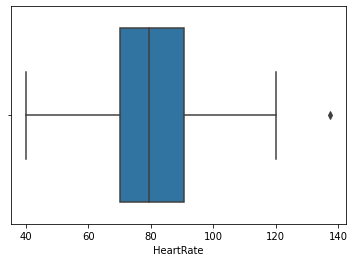

In [396]:
sns.boxplot(filtered_df['HeartRate'])

#### Clean Systolic Blood Pressure Column

In [397]:
# How many null values in the Systlolic Blood Pressure column?
print("The number of null values in the Systolic Blood Pressure column:", filtered_df['Systolic'].isna().sum())
print("The percentage of null values in the Systolic Blood Pressure column:", round(filtered_df['Systolic'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the Systolic Blood Pressure column: 29
The percentage of null values in the Systolic Blood Pressure column: 3.88 %


In [398]:
# Check for outliers
filtered_df['Systolic'].value_counts().sort_index()

1.50        1
8.00        1
10.00       2
12.00       1
26.33       1
28.25       1
39.67       1
40.00       2
55.00       1
56.00       1
57.00       1
58.50       1
60.00       4
61.11       1
62.50       1
64.50       1
68.25       1
69.36       1
70.00       3
71.00       1
72.00       1
75.00       1
77.00       1
78.00       1
78.83       1
79.75       1
80.50       1
82.00       2
83.00       2
85.00       1
85.80       1
86.50       1
87.00       1
88.00       2
88.33       1
88.38       1
89.00       1
90.00       3
91.33       1
92.00       1
92.25       1
94.00       5
94.17       1
94.50       1
95.00       1
95.29       1
95.50       1
96.00       3
96.12       1
96.22       1
96.50       1
97.00       5
97.50       2
98.00       3
98.40       1
99.00       7
99.60       1
100.00      3
100.75      1
101.00      8
101.14      1
101.32      1
102.00      6
102.33      1
102.43      1
103.00      3
103.12      1
104.00      5
104.61      1
104.67      1
104.75      1
104.86

In [399]:
# Replace erroneous values with nulls
filtered_df['Systolic'] = (
                                    np.where((filtered_df['Systolic'] < 70) |
                                    (filtered_df['Systolic'] > 250), np.nan, 
                                    filtered_df['Systolic'])
                                  )

In [400]:
# Median Systolic Blood Pressure after removing outliers
median_systolic = filtered_df['Systolic'].median(skipna=True)

median_systolic

121.0

In [401]:
# Replace nulls with median Systolic BP
filtered_df['Systolic'].fillna(median_systolic, inplace=True)

In [402]:
# How many nulls left?
filtered_df['Systolic'].isna().sum()

0

In [403]:
# Statistics for Heart Rate column
filtered_df['Systolic'].describe()

count   748.00
mean    136.17
std      35.14
min      70.00
25%     111.85
50%     121.00
75%     168.27
max     248.33
Name: Systolic, dtype: float64

#### Observations

* Systolic Blood Pressure range is between 70 and 250
* Median Systolic Blood Pressue is 121


<AxesSubplot:xlabel='Systolic'>

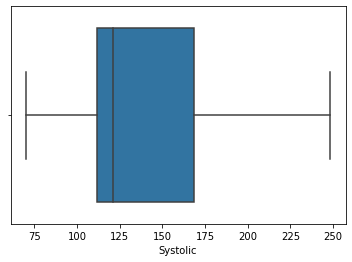

In [404]:
sns.boxplot(filtered_df['Systolic'])

#### Clean Diastolic Blood Pressue Column

In [405]:
# Rename column
filtered_df = filtered_df.rename(columns={'Diasystolic': 'Diastolic'})

In [406]:
# How many null values in the Diastolic Blood Pressure column?
print("The number of null values in the Diastolic Blood Pressure column:", filtered_df['Diastolic'].isna().sum())
print("The percentage of null values in Diastolic Blood Pressure column:", round(filtered_df['Diastolic'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the Diastolic Blood Pressure column: 29
The percentage of null values in Diastolic Blood Pressure column: 3.88 %


In [407]:
filtered_df['Diastolic'].value_counts().sort_index().head(20)

1.50     1
9.00     1
10.00    2
13.00    1
19.33    1
20.00    1
26.33    1
28.00    1
39.00    2
40.00    1
41.00    1
42.64    1
43.50    1
44.00    1
44.50    1
46.00    1
51.00    1
51.50    1
52.00    1
54.00    1
Name: Diastolic, dtype: int64

In [408]:
filtered_df['Diastolic'].value_counts().sort_index().tail(20)

111.50     1
114.00     2
115.00     1
120.00     5
122.00     1
127.00     1
132.50     1
135.00     1
148.80     1
150.00     1
153.88     1
154.33     1
170.00     1
195.00     1
200.00     1
206.00     1
312.50     1
350.00     1
508.67     1
1234.00    1
Name: Diastolic, dtype: int64

In [409]:
# Replace values < 50 and > 150
filtered_df['Diastolic'] = (
                                    np.where((filtered_df['Diastolic'] < 50) |
                                    (filtered_df['Diastolic'] > 150), np.nan, 
                                    filtered_df['Diastolic'])
                                  )

In [410]:
# Median Systolic Blood Pressure after removing outliers
median_diastolic = filtered_df['Diastolic'].median(skipna=True)

median_diastolic

73.0

In [411]:
# Median Systolic Blood Pressure after removing outliers
mean_diastolic = filtered_df['Diastolic'].mean(skipna=True)

mean_diastolic

74.71564676539525

In [412]:
# Replace nulls with median Systolic BP
filtered_df['Diastolic'].fillna(mean_diastolic, inplace=True)

In [413]:
# How many nulls left?
filtered_df['Diastolic'].isna().sum()

0

In [414]:
# Statistics for Heart Rate column
filtered_df['Diastolic'].describe()

count   748.00
mean     74.72
std      11.15
min      51.00
25%      68.00
50%      74.00
75%      79.00
max     150.00
Name: Diastolic, dtype: float64

#### Observations
- Range for Diastolic Blood Pressure is 50 and 150
- Mean Diastolic Blood Pressure is 77

<AxesSubplot:xlabel='Diastolic'>

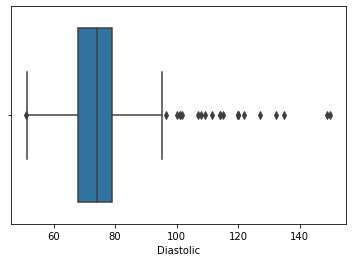

In [415]:
sns.boxplot(filtered_df['Diastolic'])

#### Clean Step Count Column

In [416]:
# How many null values in the Steps Count column?
print("The number of null values in the Step Count column:", filtered_df['StepCount'].isna().sum())
print("The percentage of null values in Step Count column:", round(filtered_df['StepCount'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the Step Count column: 323
The percentage of null values in Step Count column: 43.18 %


In [417]:
# Mean Steps after removing outliers
mean_steps = filtered_df['StepCount'].mean(skipna=True)

mean_steps

5522.6338737047145

In [418]:
# Replace nulls with mean Step Count
filtered_df['StepCount'].fillna(mean_steps, inplace=True)

In [419]:
# How many nulls left?
filtered_df['StepCount'].isna().sum()

0

In [420]:
# Statistics for Step Count column
filtered_df['StepCount'].describe()

count     748.00
mean     5522.63
std      2952.86
min         0.00
25%      5522.63
50%      5522.63
75%      7989.75
max     20000.00
Name: StepCount, dtype: float64

#### Observations
* Range for Daily Steps taken is between 0 and 20000
* Average daily steps is roughly 5500 steps

<AxesSubplot:xlabel='StepCount'>

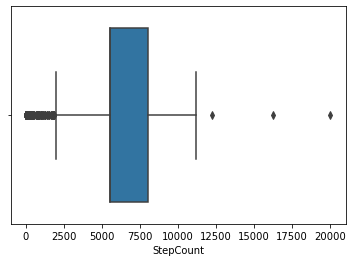

In [421]:
sns.boxplot(filtered_df['StepCount'])

#### Clean Time in Bed Column

In [422]:
# How many null values in the Time in Bed column?
print("The number of null values in the Time in Bed column:", filtered_df['TimeInBed'].isna().sum())
print("The percentage of null values in Time in Bed column:", round(filtered_df['TimeInBed'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the Time in Bed column: 421
The percentage of null values in Time in Bed column: 56.28 %


In [423]:
# Check for outliers
filtered_df['TimeInBed'].value_counts(dropna=False).sort_index().head()

60.00     1
90.00     1
120.00    6
124.29    1
180.00    2
Name: TimeInBed, dtype: int64

In [424]:
filtered_df['TimeInBed'].value_counts(dropna=False).sort_index().tail()

960.00       1
1020.00      1
1080.00      1
1200.00      3
NaN        421
Name: TimeInBed, dtype: int64

In [425]:
filtered_df['TimeInBed'] = (
                                    np.where((filtered_df['TimeInBed'] < 120) |
                                    (filtered_df['TimeInBed'] > 800), np.nan, 
                                    filtered_df['TimeInBed'])
                                  )

In [426]:
# Median Time in Bed after removing outliers
median_sleep = filtered_df['TimeInBed'].median(skipna=True)

median_sleep

422.57142857142856

In [427]:
# Replace nulls with median Systolic BP
filtered_df['TimeInBed'].fillna(median_sleep, inplace=True)

In [428]:
# How many nulls left?
filtered_df['TimeInBed'].isna().sum()

0

In [429]:
# Statistics for TimeInBed Column
filtered_df['TimeInBed'].describe()

count   748.00
mean    420.94
std      54.60
min     120.00
25%     422.57
50%     422.57
75%     422.57
max     750.00
Name: TimeInBed, dtype: float64

#### Observations
* Range for hours slept per night is between 120 minutes and 750 minutes (2 hours to 12.5 hours)
* Median is 422 minutes or roughly 7 hours of sleep per night

<AxesSubplot:xlabel='TimeInBed'>

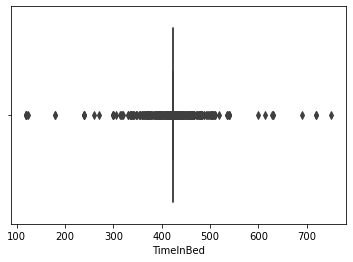

In [430]:
sns.boxplot(filtered_df['TimeInBed'])

#### Clean Respiratory Rate Column

In [431]:
# How many null values in the Respiratory Rate column?
print("The number of null values in the Respiratory Rate column:", filtered_df['RespiratoryRate'].isna().sum())
print("The percentage of null values in Respiratory Rate column:", round(filtered_df['RespiratoryRate'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the Respiratory Rate column: 72
The percentage of null values in Respiratory Rate column: 9.63 %


In [432]:
# Check for outliers
filtered_df['RespiratoryRate'].value_counts().sort_index()

1.00        2
1.50        1
6.50        1
7.00        2
8.00        1
8.25        1
8.33        1
8.50        2
8.60        1
9.00        3
9.60        1
9.75        1
10.00      68
10.20       1
10.25       2
10.29       1
10.33       6
10.36       1
10.40       1
10.46       1
10.50      13
10.62       1
10.67       1
10.70       1
10.75       1
10.80       1
10.83       1
11.00      63
11.10       1
11.17       2
11.20       2
11.25       3
11.26       1
11.29       1
11.33       3
11.40       3
11.43       3
11.46       1
11.50      10
11.54       1
11.60       1
11.62       1
11.67       3
11.75       5
11.78       1
11.80       3
11.83       1
11.87       1
12.00      47
12.11       1
12.14       2
12.20       1
12.22       1
12.23       1
12.25       3
12.33       4
12.38       1
12.40       1
12.50       5
12.56       1
12.62       2
12.67       4
12.70       1
12.71       1
12.75       4
12.78       1
12.80       1
12.81       1
12.83       1
12.86       6
12.89       1
13.00 

In [433]:
filtered_df['RespiratoryRate'] = (
                                    np.where((filtered_df['RespiratoryRate'] < 5) |
                                    (filtered_df['RespiratoryRate'] > 40), np.nan, 
                                    filtered_df['RespiratoryRate'])
                                  )

In [434]:
# Median Systolic Blood Pressure after removing outliers
median_resp = filtered_df['RespiratoryRate'].median(skipna=True)

median_resp

13.0

In [435]:
# Replace nulls with median Respiratory Rate
filtered_df['RespiratoryRate'].fillna(median_resp, inplace=True)

In [436]:
# How many nulls left?
filtered_df['RespiratoryRate'].isna().sum()

0

In [437]:
# Statistics for Resp Rate Colum
filtered_df['RespiratoryRate'].describe()

count   748.00
mean     13.55
std       3.70
min       6.50
25%      11.32
50%      13.00
75%      14.83
max      40.00
Name: RespiratoryRate, dtype: float64

#### Observations
- Respiratory Rate range is between 6.5 and 40
- Median is 13 breaths per minute


<AxesSubplot:xlabel='RespiratoryRate'>

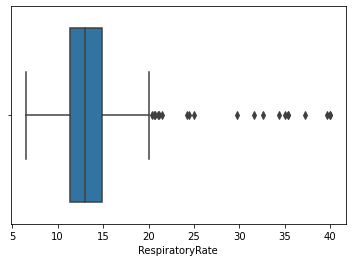

In [438]:
sns.boxplot(filtered_df['RespiratoryRate'])

#### Clean Stress Level Column

In [439]:
# How many null values in the Stress Level column?
print("The number of null values in the Stress Level column:", filtered_df['StressLevel'].isna().sum())
print("The percentage of null values in Stress Level column:", round(filtered_df['StressLevel'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the Stress Level column: 304
The percentage of null values in Stress Level column: 40.64 %


In [440]:
# Check for outliers
filtered_df['StressLevel'].value_counts().sort_index().head(20)

-1.00    134
-0.83      1
-0.75      5
-0.71      1
-0.67      3
-0.62      1
-0.60      2
-0.57      1
-0.56      1
-0.55      1
-0.50      8
-0.43      2
-0.33      6
-0.29      1
-0.25      3
-0.20      1
-0.12      2
-0.11      1
-0.06      1
0.00      50
Name: StressLevel, dtype: int64

In [441]:
# Check for outliers
filtered_df['StressLevel'].value_counts(dropna=False).sort_index().tail(10)

1.75      1
2.00     37
2.20      1
2.50      1
2.67      1
3.00     18
3.56      1
4.00      5
5.00      2
NaN     304
Name: StressLevel, dtype: int64

In [442]:
# Replace values < 0 with 0
filtered_df['StressLevel'] = np.where(filtered_df['StressLevel'] < 0, 0, filtered_df['StressLevel'])

# Replace values between 0 and 1 with 1
filtered_df['StressLevel'] = np.where((filtered_df['StressLevel'] > 0) & (filtered_df['StressLevel'] < 1), 1, filtered_df['StressLevel'])

# Replace values between 1 and 2 with 2
filtered_df['StressLevel'] = np.where((filtered_df['StressLevel'] > 1) & (filtered_df['StressLevel'] < 2), 2, filtered_df['StressLevel'])

# Replace values between 2 and 3 with 3
filtered_df['StressLevel'] = np.where((filtered_df['StressLevel'] > 2) & (filtered_df['StressLevel'] < 3), 3, filtered_df['StressLevel'])

# Replace values > 4 with 4
filtered_df['StressLevel'] = np.where(filtered_df['StressLevel'] > 3, 4, filtered_df['StressLevel'])

In [443]:
# Check value counts
filtered_df['StressLevel'].value_counts(dropna=False).sort_index()

0.00    225
1.00    132
2.00     58
3.00     21
4.00      8
NaN     304
Name: StressLevel, dtype: int64

In [444]:
# Replace nulls with 0
filtered_df['StressLevel'].fillna(0, inplace=True)

In [445]:
# How many nulls left?
filtered_df['StressLevel'].isna().sum()

0

In [446]:
# How many of each value of stress in the stress level column?
filtered_df['StressLevel'].value_counts(dropna=False).sort_index()

0.00    529
1.00    132
2.00     58
3.00     21
4.00      8
Name: StressLevel, dtype: int64

In [447]:
filtered_df['StressLevel'].value_counts(normalize=True).sort_index()

0.00   0.71
1.00   0.18
2.00   0.08
3.00   0.03
4.00   0.01
Name: StressLevel, dtype: float64

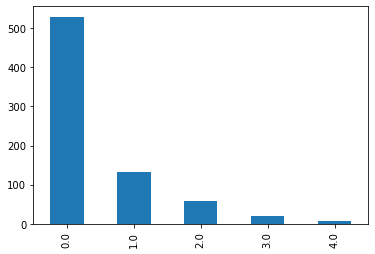

In [448]:
filtered_df['StressLevel'].value_counts().plot(kind='bar')
plt.show()

#### Observations
- 70 percent of patients reported no stress (0)
- 18 percent reported litte stress (1)
- 8 percent reported medium stress (2)
- 3 percent reported high stress (3)
- 1 percent reported very high stress (4)

#### Clean Fall Accur Column

In [449]:
# How many null values in the Fall Accur column?
print("The number of null values in the Fall Accur column:", filtered_df['FallAccur'].isna().sum())
print("The percentage of null values in Fall Accur column:", round(filtered_df['FallAccur'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the Fall Accur column: 547
The percentage of null values in Fall Accur column: 73.13 %


In [450]:
filtered_df['FallAccur'].value_counts(dropna=False).sort_index()

1.00    201
NaN     547
Name: FallAccur, dtype: int64

In [451]:
filtered_df['FallAccur'].fillna(0, inplace=True)

In [452]:
filtered_df['FallAccur'].isna().sum()

0

In [453]:
filtered_df['FallAccur'].value_counts(dropna=False).sort_index()

0.00    547
1.00    201
Name: FallAccur, dtype: int64

In [454]:
filtered_df['FallAccur'].value_counts(normalize=True).sort_index()

0.00   0.73
1.00   0.27
Name: FallAccur, dtype: float64

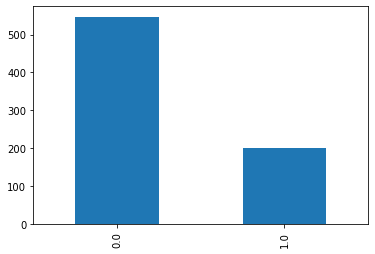

In [455]:
filtered_df['FallAccur'].value_counts().plot(kind='bar')
plt.show()

#### Observations
- 201 patients had at least 1 fall
- 547 patients had 0 falls

#### Clean Gender Column

In [456]:
# How many null values in the Gender column?
print("The number of null values in the Gender column:", filtered_df['Gender'].isna().sum())
print("The percentage of null values in Gender column:", round(filtered_df['Gender'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the Gender column: 248
The percentage of null values in Gender column: 33.16 %


In [457]:
filtered_df['Gender'].value_counts(dropna=False).sort_index()

Female     74
Gender      1
Male      118
Other     295
female      6
male        6
NaN       248
Name: Gender, dtype: int64

In [458]:
filtered_df['Gender'] = filtered_df['Gender'].replace({'female': 'Female', 'male': 'Male', 'Gender': 'Other'})

In [459]:
filtered_df['Gender'] = filtered_df['Gender'].fillna('Other')

In [460]:
filtered_df['Gender'].value_counts(dropna=False).sort_index()

Female     80
Male      124
Other     544
Name: Gender, dtype: int64

In [461]:
filtered_df['Gender'].value_counts(normalize=True).sort_index()

Female   0.11
Male     0.17
Other    0.73
Name: Gender, dtype: float64

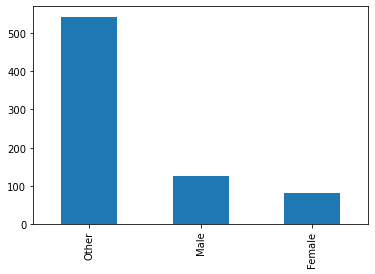

In [462]:
filtered_df['Gender'].value_counts().plot(kind='bar')
plt.show()

#### Observations
- 80 Female Patients
- 124 Male Patients
- 544 Other

#### Clean Diseases Column

In [463]:
# How many null values in the Fall Accur column?
print("The number of null values in the Diseases column:", filtered_df['Diseases'].isna().sum())
print("The percentage of null values in Diseases column:", round(filtered_df['Diseases'].isna().sum() / filtered_df.shape[0] * 100.0, 2),"%")

The number of null values in the Diseases column: 689
The percentage of null values in Diseases column: 92.11 %


In [464]:
filtered_df['Diseases'].value_counts(dropna=False).sort_index().to_frame()

,Diseases
Angina,3
"Angina, Hypertension, Multiple sclerosis (MS)",1
Arthritis,2
Bipolar disorder,1
"Bipolar disorder, Arthritis",1
"Bipolar disorder, Asthma",1
Bronchitis,5
"Bronchitis, Angina",1
"Bronchitis, Arthritis",1
"Bronchitis, Bipolar disorder",4


In [465]:
filtered_df['Diseases'] = filtered_df['Diseases'].notna().astype(int)

In [466]:
filtered_df['Diseases'].value_counts(dropna=False).sort_index()

0    689
1     59
Name: Diseases, dtype: int64

In [467]:
filtered_df['Diseases'].value_counts(normalize=True).sort_index()

0   0.92
1   0.08
Name: Diseases, dtype: float64

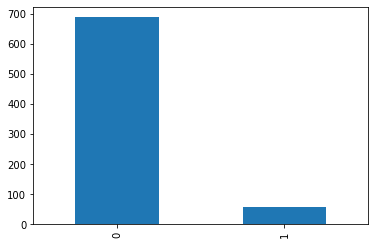

In [468]:
filtered_df['Diseases'].value_counts().plot(kind='bar')
plt.show()

#### Observations
- 689 patients did not report any diseases
- 59 patients reported at least 1 disease

#### Summary of Cleaned Dataframe

In [469]:
filtered_df.head()

,PatientId,Age,Weight,BodyTemperature,OxygenLevel,BloodSugar,HRV,HeartRate,Systolic,Diastolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,FallAccur,BMI,Gender,Diseases
11,49,36.00,83.00,37.00,97.50,NaN,85.00,76.50,109.50,69.50,5522.63,422.57,13.00,0.00,0.00,NaN,Other,0
23,134,36.00,83.00,37.00,95.67,8.00,113.20,76.94,100.00,100.00,143.06,391.07,13.67,2.00,1.00,NaN,Male,0
25,136,90.00,113.38,37.00,96.16,8.08,51.59,84.36,121.61,73.25,4292.04,627.69,15.01,1.00,1.00,11.38,Male,1
27,140,63.00,90.00,37.00,96.56,NaN,70.14,70.60,118.22,73.56,1508.00,422.57,12.89,0.00,0.00,NaN,Other,0
37,162,36.00,83.00,37.00,97.00,1233.00,1234.00,79.33,121.00,74.72,1234.00,690.00,13.00,0.00,1.00,NaN,Other,0


In [470]:
filtered_df.shape

(748, 18)

In [471]:
filtered_df.isna().sum()

PatientId            0
Age                  0
Weight               0
BodyTemperature      0
OxygenLevel          0
BloodSugar         425
HRV                 16
HeartRate            0
Systolic             0
Diastolic            0
StepCount            0
TimeInBed            0
RespiratoryRate      0
StressLevel          0
FallAccur            0
BMI                479
Gender               0
Diseases             0
dtype: int64

In [472]:
filtered_df.describe()

,PatientId,Age,Weight,BodyTemperature,OxygenLevel,BloodSugar,HRV,HeartRate,Systolic,Diastolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,FallAccur,BMI,Diseases
count,748.00,748.00,748.00,748.00,748.00,323.00,732.00,748.00,748.00,748.00,748.00,748.00,748.00,748.00,748.00,269.00,748.00
mean,4036.46,36.02,85.52,37.36,97.49,117.05,80.06,79.24,136.17,74.72,5522.63,420.94,13.55,0.46,0.27,125.16,0.08
std,1240.09,8.15,21.01,0.67,3.13,90.72,48.34,13.40,35.14,11.15,2952.86,54.60,3.70,0.84,0.44,135.33,0.27
min,49.00,21.00,39.00,36.00,90.09,0.06,4.00,40.00,70.00,51.00,0.00,120.00,6.50,0.00,0.00,1.00,0.00
25%,3620.50,36.00,83.00,37.00,96.57,51.57,63.19,70.00,111.85,68.00,5522.63,422.57,11.32,0.00,0.00,111.50,0.00
50%,4163.50,36.00,83.00,37.00,97.00,145.33,81.58,79.33,121.00,74.00,5522.63,422.57,13.00,0.00,0.00,126.00,0.00
75%,4873.50,36.00,83.00,37.87,98.00,155.45,94.00,90.72,168.27,79.00,7989.75,422.57,14.83,1.00,1.00,139.12,0.00
max,6273.00,100.00,270.00,40.58,119.88,1233.00,1234.00,137.50,248.33,150.00,20000.00,750.00,40.00,4.00,1.00,2191.48,1.00


#### 13 Columns to use:
- Age
- Weight
- Body Temperature
- Oxygen Level
- Resting Heart Rate
- Systolic Blood Pressure
- Diastolic Blood Pressue
- Step Count
- Time in Bed
- Respiratory Rate
- Stress Level
- Fall Accur
- Diseases

#### 5 Columns not used:

* Patient Id
* Blood Sugar
* Heart Rate Variability
* Body Mass Index
* Gender

#### Create Risk Column

In [473]:
# Adjust these thresholds based on your criteria
threshold_vital_signs = {
    'weight': 200,  
    'body temperature': 40,
    'oxygen level': 93,
    'heart rate': 100,
    'systolic': 180,
    'diastolic': 120,
    'time in bed': 120,
    'respiratory rate': 25,
    'stress level': 4,
    'fall accur': 1,
    'diseases': 1
}

In [474]:
# Creating the new binary risk column
filtered_df['Risk'] = np.where(
            (filtered_df['Weight'] >= threshold_vital_signs['weight']) | 
            (filtered_df['BodyTemperature'] >= threshold_vital_signs['body temperature']) | 
            (filtered_df['OxygenLevel'] <= threshold_vital_signs['oxygen level']) |
            (filtered_df['HeartRate'] >= threshold_vital_signs['heart rate']) | 
            (filtered_df['Systolic'] >= threshold_vital_signs['systolic']) | 
            (filtered_df['Diastolic'] >= threshold_vital_signs['diastolic']) | 
            (filtered_df['TimeInBed'] <= threshold_vital_signs['time in bed']) |
            (filtered_df['RespiratoryRate'] >= threshold_vital_signs['respiratory rate']) | 
            (filtered_df['StressLevel'] == threshold_vital_signs['stress level']) | 
            (filtered_df['FallAccur'] == threshold_vital_signs['fall accur']),
            (filtered_df['Diseases'] == threshold_vital_signs['diseases']) | 
    1, 
    0
)

In [475]:
filtered_df['Risk'].value_counts()

0    454
1    294
Name: Risk, dtype: int64

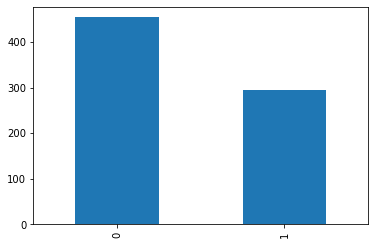

In [476]:
filtered_df['Risk'].value_counts().plot(kind='bar')
plt.show()

#### Observations
* 454 patients categorized as not at risk
* 294 patients categorized as at risk

In [477]:
filtered_df.groupby('Risk').mean().iloc[:, 1:]

,Age,Weight,BodyTemperature,OxygenLevel,BloodSugar,HRV,HeartRate,Systolic,Diastolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,FallAccur,BMI,Diseases
Risk,,,,,,,,,,,,,,,,
0,36.19,83.40,37.11,97.45,119.04,74.30,75.24,120.61,71.95,5013.37,422.80,12.58,0.47,0.00,122.77,0.07
1,35.77,88.79,37.75,97.54,116.49,88.78,85.41,160.20,78.99,6309.06,418.07,15.04,0.44,0.68,125.83,0.10


#### Observations

- Average age for at risk and not at risk is roughly the same
- Average weight for at risk patients is 88.79 kg vs. 83.40 kg for not at risk (About 5.4 kg more on average)
- Average body temperature for at risk is 37.75 celsius (99.95 fahrenheit) vs. 37.11 celsius (98.80 fahrenheit) for not at risk (About .65 degrees celsius more on average)
- Average oxygen level for at risk and not at risk is roughly the same
- Average resting heart rate is 84 beats per minute for at risk vs. 75 beats per minute for not at risk (About 9 BPM more on average)
- Average systolic is 160 mm Hg for at risk vs. 120 mm Hg for not at risk (About 30 mm Hg more on average)
- Average diastolic is 79 mm Hg for at risk vs 72 mm Hg for not at risk (About 7 mm Hg more on average)
- Average step count surprisingly is higher for at risk patients (6309 steps for at risk vs 5013 for not at risk)
- Average respiratory rate for at risk is 15 breaths per minute compared to 12.5 breaths per minute for not at risk (About 2.5 breaths per minute more on average)

#### Correlation of Independent Variables to Risk

In [478]:
filtered_df.corr()[['Risk']].iloc[1:-1]

,Risk
Age,-0.03
Weight,0.13
BodyTemperature,0.46
OxygenLevel,0.01
BloodSugar,-0.01
HRV,0.15
HeartRate,0.37
Systolic,0.55
Diastolic,0.31
StepCount,0.21


#### Observations
- Fall Accur is highly correlated with Risk at 0.75
- Systolic Blood Pressue is moderately correlated with Risk 0.55
- Body Temperatue is moderately correlated with Risk at 0.46
- Resting Heart Rate is moderately correlated with Risk at 0.37

#### Correlation between Independent Variables

In [479]:
corr = filtered_df.drop(['PatientId', 'BloodSugar', 'HRV', 'BMI', 'Gender', 'Risk'], axis=1).corr()

In [480]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

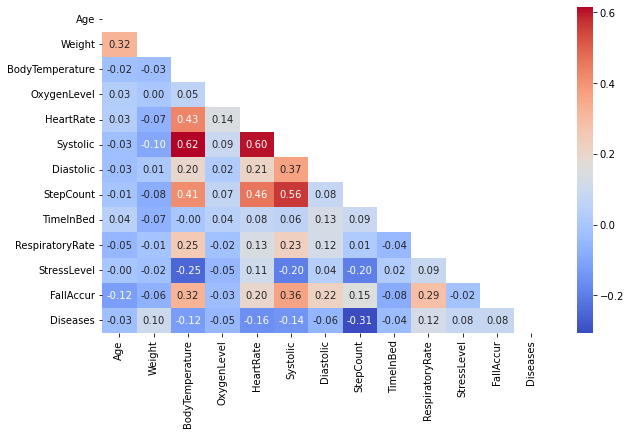

In [481]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

#### Save Final Dataframe as a csv

In [482]:
filtered_df.to_csv('filtered_df.csv')

### Prepare Data for Modelling

In [483]:
filtered_df.head()

,PatientId,Age,Weight,BodyTemperature,OxygenLevel,BloodSugar,HRV,HeartRate,Systolic,Diastolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,FallAccur,BMI,Gender,Diseases,Risk
11,49,36.00,83.00,37.00,97.50,NaN,85.00,76.50,109.50,69.50,5522.63,422.57,13.00,0.00,0.00,NaN,Other,0,0
23,134,36.00,83.00,37.00,95.67,8.00,113.20,76.94,100.00,100.00,143.06,391.07,13.67,2.00,1.00,NaN,Male,0,1
25,136,90.00,113.38,37.00,96.16,8.08,51.59,84.36,121.61,73.25,4292.04,627.69,15.01,1.00,1.00,11.38,Male,1,1
27,140,63.00,90.00,37.00,96.56,NaN,70.14,70.60,118.22,73.56,1508.00,422.57,12.89,0.00,0.00,NaN,Other,0,0
37,162,36.00,83.00,37.00,97.00,1233.00,1234.00,79.33,121.00,74.72,1234.00,690.00,13.00,0.00,1.00,NaN,Other,0,1


In [484]:
# Create independent variables
X = filtered_df.drop(['PatientId', 'BloodSugar', 'HRV', 'BMI', 'Gender', 'FallAccur', 'Risk'], axis=1)

In [485]:
# Check the first 5 rows
X.head()

,Age,Weight,BodyTemperature,OxygenLevel,HeartRate,Systolic,Diastolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,Diseases
11,36.00,83.00,37.00,97.50,76.50,109.50,69.50,5522.63,422.57,13.00,0.00,0
23,36.00,83.00,37.00,95.67,76.94,100.00,100.00,143.06,391.07,13.67,2.00,0
25,90.00,113.38,37.00,96.16,84.36,121.61,73.25,4292.04,627.69,15.01,1.00,1
27,63.00,90.00,37.00,96.56,70.60,118.22,73.56,1508.00,422.57,12.89,0.00,0
37,36.00,83.00,37.00,97.00,79.33,121.00,74.72,1234.00,690.00,13.00,0.00,0


In [486]:
# Check the shape
X.shape

(748, 12)

- 748 rows and 12 columns will be used for the independent variables

In [487]:
# Create dependent variable
y = filtered_df['Risk']

In [488]:
# Check the first five rows
y.head()

11    0
23    1
25    1
27    0
37    1
Name: Risk, dtype: int32

#### Split data into train and test set

In [489]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [490]:
# Check to see if data has been split correctly
round(X_train.shape[0] / filtered_df.shape[0], 3)

0.699

In [491]:
round(X_test.shape[0] / filtered_df.shape[0], 3)

0.301

In [492]:
# Check the first 5 rows of the X_train dataframe
X_train.head()

,Age,Weight,BodyTemperature,OxygenLevel,HeartRate,Systolic,Diastolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,Diseases
616,36.00,83.00,37.00,100.00,65.00,96.00,61.00,5522.63,422.57,10.00,0.00,0
843,36.00,83.00,37.90,99.11,90.33,202.56,85.78,8356.44,429.78,14.89,0.00,0
277,44.00,270.00,37.00,97.33,58.33,101.00,64.67,5522.63,422.57,10.33,0.00,0
630,65.00,210.00,37.44,97.59,55.36,120.19,69.36,2711.41,335.00,11.62,1.00,0
1234,36.00,83.00,37.00,99.00,83.00,119.00,63.00,53.00,422.57,13.00,0.00,1


In [493]:
y_train.head()

616     0
843     1
277     1
630     1
1234    0
Name: Risk, dtype: int32

In [494]:
X_test.head()

,Age,Weight,BodyTemperature,OxygenLevel,HeartRate,Systolic,Diastolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,Diseases
1135,36.00,83.00,37.00,97.50,68.50,111.00,69.00,5522.63,422.57,15.00,0.00,0
785,36.00,83.00,38.41,93.71,97.43,187.43,74.43,8960.86,370.14,17.43,0.00,0
570,36.00,83.00,37.00,98.00,70.00,117.33,66.33,139.33,422.57,14.00,0.00,0
279,30.00,83.00,37.11,97.12,82.26,123.28,71.77,153.91,480.00,15.09,1.00,1
865,36.00,83.00,38.15,99.67,89.17,192.00,71.00,8755.17,363.17,11.00,0.00,0


In [495]:
y_test.head()

1135    0
785     1
570     0
279     1
865     1
Name: Risk, dtype: int32

#### Feature Scaling

In [496]:
# columns_to_scale = ['Age', 'Weight', 'BodyTemperature', 'OxygenLevel', 'HeartRate', 
#                    'Systolic', 'Diastolic', 'StepCount', 'TimeInBed', 'RespiratoryRate']

In [497]:
# Create dataframe for training columns to scale
X_train_to_scale = X_train.iloc[:, :10]

X_train_to_scale.head()

,Age,Weight,BodyTemperature,OxygenLevel,HeartRate,Systolic,Diastolic,StepCount,TimeInBed,RespiratoryRate
616,36.00,83.00,37.00,100.00,65.00,96.00,61.00,5522.63,422.57,10.00
843,36.00,83.00,37.90,99.11,90.33,202.56,85.78,8356.44,429.78,14.89
277,44.00,270.00,37.00,97.33,58.33,101.00,64.67,5522.63,422.57,10.33
630,65.00,210.00,37.44,97.59,55.36,120.19,69.36,2711.41,335.00,11.62
1234,36.00,83.00,37.00,99.00,83.00,119.00,63.00,53.00,422.57,13.00


In [498]:
# Create dataframe for training columns not to scale
X_train_not_to_scale = X_train.iloc[:, 10:]

X_train_not_to_scale.head()

,StressLevel,Diseases
616,0.00,0
843,0.00,0
277,0.00,0
630,1.00,0
1234,0.00,1


In [499]:
# Create dataframe for testing columns to scale
X_test_to_scale = X_test.iloc[:, :10]  # Columns to scale

X_test_to_scale.head()

,Age,Weight,BodyTemperature,OxygenLevel,HeartRate,Systolic,Diastolic,StepCount,TimeInBed,RespiratoryRate
1135,36.00,83.00,37.00,97.50,68.50,111.00,69.00,5522.63,422.57,15.00
785,36.00,83.00,38.41,93.71,97.43,187.43,74.43,8960.86,370.14,17.43
570,36.00,83.00,37.00,98.00,70.00,117.33,66.33,139.33,422.57,14.00
279,30.00,83.00,37.11,97.12,82.26,123.28,71.77,153.91,480.00,15.09
865,36.00,83.00,38.15,99.67,89.17,192.00,71.00,8755.17,363.17,11.00


In [500]:
# Create dataframe for testing columns not to scale
X_test_not_to_scale = X_test.iloc[:, 10:]

X_test_not_to_scale.head()

,StressLevel,Diseases
1135,0.00,0
785,0.00,0
570,0.00,0
279,1.00,1
865,0.00,0


In [501]:
from sklearn.preprocessing import StandardScaler

In [502]:
# Instantiate the scaler
scaler = StandardScaler()

In [503]:
# Scale the columns
X_train_scaled = scaler.fit_transform(X_train_to_scale)
X_test_scaled = scaler.transform(X_test_to_scale)

In [504]:
# Convert into a pandas dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train_to_scale.index, columns=X_train_to_scale.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test_to_scale.index, columns=X_test_to_scale.columns)

#### Combine X Train Dataframe

In [505]:
X_train_scaled_df.head()

,Age,Weight,BodyTemperature,OxygenLevel,HeartRate,Systolic,Diastolic,StepCount,TimeInBed,RespiratoryRate
616,0.04,-0.12,-0.57,0.76,-1.07,-1.14,-1.25,-0.04,0.06,-0.95
843,0.04,-0.12,0.80,0.49,0.83,1.88,1.05,0.94,0.19,0.39
277,1.12,9.40,-0.57,-0.05,-1.58,-0.99,-0.91,-0.04,0.06,-0.86
630,3.94,6.34,0.10,0.03,-1.80,-0.45,-0.48,-1.00,-1.55,-0.51
1234,0.04,-0.12,-0.57,0.46,0.28,-0.48,-1.07,-1.91,0.06,-0.13


In [506]:
X_train_not_to_scale.head()

,StressLevel,Diseases
616,0.00,0
843,0.00,0
277,0.00,0
630,1.00,0
1234,0.00,1


In [507]:
X_train_final = pd.concat([X_train_scaled_df, X_train_not_to_scale], axis=1)

X_train_final.head()

,Age,Weight,BodyTemperature,OxygenLevel,HeartRate,Systolic,Diastolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,Diseases
616,0.04,-0.12,-0.57,0.76,-1.07,-1.14,-1.25,-0.04,0.06,-0.95,0.00,0
843,0.04,-0.12,0.80,0.49,0.83,1.88,1.05,0.94,0.19,0.39,0.00,0
277,1.12,9.40,-0.57,-0.05,-1.58,-0.99,-0.91,-0.04,0.06,-0.86,0.00,0
630,3.94,6.34,0.10,0.03,-1.80,-0.45,-0.48,-1.00,-1.55,-0.51,1.00,0
1234,0.04,-0.12,-0.57,0.46,0.28,-0.48,-1.07,-1.91,0.06,-0.13,0.00,1


In [508]:
X_train_final.shape

(523, 12)

#### Combine X Test Dataframe

In [509]:
X_test_scaled_df.head()

,Age,Weight,BodyTemperature,OxygenLevel,HeartRate,Systolic,Diastolic,StepCount,TimeInBed,RespiratoryRate
1135,0.04,-0.12,-0.57,0.00,-0.81,-0.71,-0.51,-0.04,0.06,0.42
785,0.04,-0.12,1.57,-1.15,1.36,1.45,-0.00,1.14,-0.91,1.09
570,0.04,-0.12,-0.57,0.15,-0.70,-0.53,-0.76,-1.88,0.06,0.15
279,-0.77,-0.12,-0.40,-0.11,0.22,-0.36,-0.25,-1.88,1.11,0.45
865,0.04,-0.12,1.17,0.66,0.74,1.58,-0.32,1.07,-1.04,-0.67


In [510]:
X_test_not_to_scale.head()

,StressLevel,Diseases
1135,0.00,0
785,0.00,0
570,0.00,0
279,1.00,1
865,0.00,0


In [511]:
X_test_final = pd.concat([X_test_scaled_df, X_test_not_to_scale], axis=1)

X_test_final.head()

,Age,Weight,BodyTemperature,OxygenLevel,HeartRate,Systolic,Diastolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,Diseases
1135,0.04,-0.12,-0.57,0.00,-0.81,-0.71,-0.51,-0.04,0.06,0.42,0.00,0
785,0.04,-0.12,1.57,-1.15,1.36,1.45,-0.00,1.14,-0.91,1.09,0.00,0
570,0.04,-0.12,-0.57,0.15,-0.70,-0.53,-0.76,-1.88,0.06,0.15,0.00,0
279,-0.77,-0.12,-0.40,-0.11,0.22,-0.36,-0.25,-1.88,1.11,0.45,1.00,1
865,0.04,-0.12,1.17,0.66,0.74,1.58,-0.32,1.07,-1.04,-0.67,0.00,0


In [512]:
X_test_final.shape

(225, 12)

In [513]:
# import statsmodels.api as sm

In [514]:
#X_with_constant = sm.add_constant(X_scaled_all)

#X_with_constant.head()

### Fit Logistic Regression Model on Training Set

In [515]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

In [516]:
# Instantiate
logreg_model = LogisticRegression()

In [517]:
# K-fold Cross Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores = cross_val_score(logreg_model, X_train_final, y_train, cv=kf)

In [518]:
print(f"All Training Cross-Validation Scores: {[round(x, 3) for x in cv_scores]}")
print(f"Average Training Cross Validation Scores: {round(np.mean(cv_scores), 3)} +- {round(np.std(cv_scores), 3)}")

All Training Cross-Validation Scores: [0.81, 0.838, 0.79, 0.827, 0.817]
Average Training Cross Validation Scores: 0.816 +- 0.016


#### Observations
- Average accuracy on the training set is **81.6 %** across 5 folds
- Minimum accuracy was **79 %** and highest accuracy was **83.8 %**
- Standard deviation was **0.016**

In [519]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [520]:
# Hyperparameter tuning using Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

grid_search = GridSearchCV(logreg_model, param_grid, cv=folds, n_jobs=-1, verbose=1)
grid_search.fit(X_train_final, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 0.1, 'solver': 'newton-cg'}


#### Find the best model

In [521]:
best_model = grid_search.best_estimator_

best_model

LogisticRegression(C=0.1, solver='newton-cg')

#### Fit the best model on the training data

In [522]:
best_model.fit(X_train_final, y_train)

LogisticRegression(C=0.1, solver='newton-cg')

#### Model Coefficients

In [523]:
print('classes', best_model.classes_)
print('intercept ', best_model.intercept_[0])
pd.DataFrame({'coeff': best_model.coef_[0],
             'odds-ratio': np.exp(best_model.coef_[0])},
             index=X.columns)

classes [0 1]
intercept  -0.807128196658666


,coeff,odds-ratio
Age,-0.14,0.87
Weight,0.45,1.56
BodyTemperature,0.45,1.56
OxygenLevel,-0.08,0.92
HeartRate,0.19,1.20
Systolic,1.00,2.71
Diastolic,0.34,1.40
StepCount,-0.26,0.77
TimeInBed,-0.17,0.84
RespiratoryRate,0.35,1.42


#### Predict values on the training set

In [524]:
# Training set predictions
y_pred_lr_train = best_model.predict(X_train_final)

#### Predict values on the test set

In [525]:
# Test set predictions
y_pred_lr_test = best_model.predict(X_test_final)

### Evaluation of the Logistic Regression Model

In [526]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score

#### Accuracy

In [527]:
print("Accuracy of Logistic Regression Model on Training Set: " + str(round(accuracy_score(y_train, y_pred_lr_train), 3)))
print("Accuracy of Logistic Regression Model on Test Set: " + str(round(accuracy_score(y_test, y_pred_lr_test),3)))

Accuracy of Logistic Regression Model on Training Set: 0.824
Accuracy of Logistic Regression Model on Test Set: 0.822


#### Observations
- Accuracy for the best logistic regression on the test set is **82.2 %**
- Accuracy for the best logistic regression on the training set is 82.4 %
- Only a .2 % difference, indicating a well fit model (not overfit, not underfit)

#### Confusion Matrix

In [528]:
cm_lr = confusion_matrix(y_test, y_pred_lr_test)

print(cm_lr)

[[115  15]
 [ 25  70]]


In [529]:
TP_lr = cm_lr[1,1]
FP_lr = cm_lr[0,1]
TN_lr = cm_lr[0,0]
FN_lr = cm_lr[1,0]

print("True Positives: " + str(TP_lr))
print("False Positives: " + str(FP_lr))
print("True Negatives: " + str(TN_lr))
print("False Negatives: " + str(FN_lr))

True Positives: 70
False Positives: 15
True Negatives: 115
False Negatives: 25


#### Observations

- 70 correct predictions of risk (True Positives)
- 15 instances where risk was predicted but no risk observed (False Positives)
- 115 correct predictions of no risk (True Negatives)
- 25 instance where risk was not predicted but risk was observed (False Negatives)

#### Classification Report

In [530]:
print(classification_report(y_test, y_pred_lr_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.82      0.74      0.78        95

    accuracy                           0.82       225
   macro avg       0.82      0.81      0.81       225
weighted avg       0.82      0.82      0.82       225



#### Precision

In [531]:
precision_lr = precision_score(y_test, y_pred_lr_test)

print(round(precision_lr * 100, 2))

82.35


#### Observations
- 70 out of the 85 people our model predicted to be at risk were actually at risk
- The precision therefore is 82.35 % (70 / (70 + 15))

#### Recall (Also called Sensitivity)

In [532]:
recall_lr = recall_score(y_test, y_pred_lr_test)  

print(round(recall_lr * 100, 2))

73.68


#### Observations
* Our model correctly identified 70 out of the 95 patients who were at risk of hospitalization
* The recall therefore is 73.68 % (70 / 95)
* Another way: Our model was not able to identify 25 patients who were at risk or 26.31 % (25 / 95)


#### Specificity

In [533]:
specificity_lr = TN_lr / (TN_lr + FP_lr)

print(round(specificity_lr * 100, 2))

88.46


#### False Positive Rate (1 - Specificity)

In [534]:
false_positive_rate_lr = 1 - specificity_lr

print(round(false_positive_rate_lr * 100, 2))

11.54


### What is the percent chance that a person is admitted to the hospital?

In [535]:
y_pred_proba_lr = best_model.predict_proba(X_test_final)[:, 1]

y_pred_proba_lr[:10]

array([0.1187548 , 0.86682717, 0.17925272, 0.41699057, 0.70575371,
       0.25737887, 0.61103971, 0.14931696, 0.77302193, 0.042333  ])

### What is the AUC? (Area Under Curve)

In [536]:
from sklearn import metrics

In [537]:
from sklearn.metrics import roc_auc_score

In [538]:
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_lr)

# auc = metrics.roc_auc_score(y_test, y_pred_proba_lr)

In [539]:
# print(round(auc, 2))

In [540]:
# logit_roc_auc = roc_auc_score(y_test, best_model.predict(X_test_final))

# logit_roc_auc

In [541]:
# plt.figure(figsize=(7,5))
# plt.plot(fpr, tpr, label= 'Logistic Regression AUC = ' + str(round(auc, 2)))
# plt.plot([0, 1], [0, 1],'r--', label = 'Random')
# plt.title('Receiver Operating Characteric (ROC) Curve', size=16)
# plt.xlabel('False Positive Rate', size=14)
# plt.ylabel('True Positive Rate', size=14)
# plt.legend(loc=4)
# plt.show()

### Fit Random Forest Classifier on Training Set

In [542]:
from sklearn.ensemble import RandomForestClassifier

In [543]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [544]:
# K-fold Cross Validation
kf_rf = KFold(n_splits=5, random_state=42, shuffle=True)

cv_scores_rf = cross_val_score(rf_model, X_train_final, y_train, cv=kf_rf)

In [545]:
print(f"All Training Cross-Validation Scores: {[round(x, 3) for x in cv_scores_rf]}")
print(f"Average Training Cross Validation Scores: {round(np.mean(cv_scores_rf), 3)} +- {round(np.std(cv_scores_rf), 3)}")

All Training Cross-Validation Scores: [0.886, 0.905, 0.838, 0.865, 0.875]
Average Training Cross Validation Scores: 0.874 +- 0.022


#### Observations
- Average accuracy on the training set is **87.4 %** across 5 folds
- Minimum accuracy was **83.8 %** and highest accuracy was **90.5 %**
- Standard deviation was **0.022**

In [546]:
# Defining the hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

folds_rf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=folds_rf, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_final, y_train)

# Best parameters
print("Best parameters:", grid_search_rf.best_params_)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


#### Find the best Random Forest Model

In [547]:
best_model_rf = grid_search_rf.best_estimator_

best_model_rf

RandomForestClassifier(max_depth=10, random_state=42)

#### Fit the best model on the training data

In [548]:
best_model_rf.fit(X_train_final, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

#### Predict values on the training set

In [549]:
y_pred_rf_train = best_model_rf.predict(X_train_final)

#### Predict values on the test set

In [550]:
y_pred_rf_test = best_model_rf.predict(X_test_final)

### Evaluation of the Random Forest Classifier

#### Accuracy

In [551]:
print("Accuracy of Random Forest Model on Training Set: " + str(round(accuracy_score(y_train, y_pred_rf_train), 3)))
print("Accuracy of Random Model on Test Set: " + str(round(accuracy_score(y_test, y_pred_rf_test),3)))

Accuracy of Random Forest Model on Training Set: 0.992
Accuracy of Random Model on Test Set: 0.876


#### Observations
- Accuracy for the best random forest classifier on the test set is **87.6 %**
- An improvement from the 82.4 % (or a **5.2 %** increase) accuracy of the logistic regression model

#### Confusion Matrix

In [552]:
cm_rf = confusion_matrix(y_test, y_pred_rf_test)

print(cm_rf)

[[116  14]
 [ 14  81]]


In [553]:
TP_rf = cm_rf[1,1]
FP_rf = cm_rf[0,1]
TN_rf = cm_rf[0,0]
FN_rf = cm_rf[1,0]

print("True Positives: " + str(TP_rf))
print("False Positives: " + str(FP_rf))
print("True Negatives: " + str(TN_rf))
print("False Negatives: " + str(FN_rf))

True Positives: 81
False Positives: 14
True Negatives: 116
False Negatives: 14


#### Observations
- 81 correct predictions of risk (True Positives)
- 14 instances where risk was predicted but no risk observed (False Positives)
- 116 correct predictions of no risk (True Negatives)
- 14 instance where risk was not predicted but risk was observed (False Negatives)

#### Classification Report

In [554]:
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       130
           1       0.85      0.85      0.85        95

    accuracy                           0.88       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.88      0.88      0.88       225



#### Precision

In [555]:
precision_rf = precision_score(y_test, y_pred_rf_test)

print(round(precision_rf * 100, 2))

85.26


#### Observations
- 81 out of the 95 people our model predicted to be at risk were actually at risk
- The precision therefore is 85.26 % (81 / (81 + 14))

#### Recall (Also called Sensitity)

In [556]:
recall_rf = recall_score(y_test, y_pred_rf_test)  

print(round(recall_rf * 100, 2))

85.26


#### Observations
* Our model correctly identified 81 out of the 95 patients who were at risk of hospitalization
* The recall therefore is 85.26 % (81 / (81+14))
* Another way: Our model was not able to identify 14 patients who were at risk of hospitalization or  14.74 % (14/95)

#### Specificity

In [557]:
specificity_rf = TN_rf / (TN_rf + FP_rf)

print(round(specificity_rf* 100, 2))

89.23


#### False Positive Rate

In [558]:
false_positive_rate_rf = 1 - specificity_rf

print(round(false_positive_rate_rf * 100, 2))

10.77


### What is the percent chance that a person is admitted to the hospital?

In [559]:
y_pred_proba_rf = best_model_rf.predict_proba(X_test_final)[:, 1]

y_pred_proba_rf[:10]

array([0.01366753, 0.98      , 0.07406456, 0.70806604, 0.93946429,
       0.42521998, 0.43966457, 0.01462672, 0.35864599, 0.5175601 ])

### What is the AUC? (Area Under Curve)

In [560]:
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_rf)

# auc_rf = metrics.roc_auc_score(y_test, y_pred_proba_rf)

# print(auc_rf)

In [561]:
# plt.figure(figsize=(7,5))
# plt.plot(fpr, tpr, label = 'Random Forest AUC = ' + str(round(auc_rf, 2)))
# plt.plot([0, 1], [0, 1],'r--', label = 'Random')
# plt.title('Receiver Operating Characteric (ROC) Curve', size=16)
# plt.xlabel('False Positive Rate', size=14)
# plt.ylabel('True Positive Rate', size=14)
# plt.legend(loc=4)
# plt.show()

### Fit Gradient Boosting Classifier on Training Set

In [562]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [563]:
# Instantiate
gb_model = GradientBoostingClassifier()

In [564]:
# K-fold Cross Validation
kf_gb = KFold(n_splits=5, random_state=42, shuffle=True)

cv_scores_gb = cross_val_score(gb_model, X_train_final, y_train, cv=kf_gb)

In [565]:
print(f"All Training Cross-Validation Scores: {[round(x, 3) for x in cv_scores_gb]}")
print(f"Average Training Cross Validation Scores: {round(np.mean(cv_scores_gb), 3)} +- {round(np.std(cv_scores_gb), 3)}")

All Training Cross-Validation Scores: [0.895, 0.905, 0.838, 0.875, 0.885]
Average Training Cross Validation Scores: 0.88 +- 0.023


#### Observations
- Average accuracy on the training set is **87.8 %** across 5 folds
- Minimum accuracy was **82.9 %** (lower than Random Forest minimum) and highest accuracy was **90.5 %** (same as Random Forest)
- Standard deviation was **0.026**

- Slightly higher average accuracy compared to Random Forest but also slightly higher standard deviation

In [566]:
# Param Grid
param_grid_gb = {
    'n_estimators': np.arange(100, 1001, 100),
    'learning_rate': np.linspace(0.01, 1, 10),
    'max_depth': np.arange(3, 14, 2),
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 21, 2) }

#### Grid Search

In [567]:
folds_gb = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [568]:
# grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=folds_gb, n_jobs=-1, verbose=2)
# grid_search_gb.fit(X_train_final, y_train)

# Best parameters
# print("Best parameters:", grid_search_gb.best_params_)

#### Randomized Search

In [569]:
# Hyperparameter tuning
random_search_gb = RandomizedSearchCV(gb_model, param_distributions=param_grid_gb, n_iter=100, cv=folds_gb, 
                                      verbose=1, random_state=42, n_jobs=-1)

random_search_gb.fit(X_train_final, y_train)

# Best parameters
print("Best parameters:", random_search_gb.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'n_estimators': 1000, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_depth': 13, 'learning_rate': 0.23}


#### Find the best Gradient Boosting model

In [570]:
best_model_gb = random_search_gb.best_estimator_

best_model_gb

GradientBoostingClassifier(learning_rate=0.23, max_depth=13, min_samples_leaf=3,
                           min_samples_split=12, n_estimators=1000)

####  Fit the best model on the training data

In [571]:
best_model_gb.fit(X_train_final, y_train)

GradientBoostingClassifier(learning_rate=0.23, max_depth=13, min_samples_leaf=3,
                           min_samples_split=12, n_estimators=1000)

#### Predict values on the training data 

In [572]:
y_pred_gb_train = best_model_gb.predict(X_train_final)

#### Predict values on the test data 

In [573]:
y_pred_gb_test = best_model_gb.predict(X_test_final)

### Evaluation of the Gradient Boosting Classifier

#### Accuracy

In [574]:
print("Accuracy of Gradient Boosting Model on Training Set: " + str(round(accuracy_score(y_train, y_pred_gb_train), 4)))
print("Accuracy of Gradient Boosting Model on Test Set: " + str(round(accuracy_score(y_test, y_pred_gb_test),4)))

Accuracy of Gradient Boosting Model on Training Set: 1.0
Accuracy of Gradient Boosting Model on Test Set: 0.8889


#### Observations
- Accuracy for the best Gradient Boosting classifier on the test set is **88.89 %**
- An improvement from the 87.6 % (or a **1.3 %** increase) accuracy of the random forest model

#### Confusion Matrix

In [575]:
cm_gb = confusion_matrix(y_test, y_pred_gb_test)

print(cm_gb)

[[118  12]
 [ 13  82]]


In [576]:
TP_gb = cm_gb[1,1]
FP_gb = cm_gb[0,1]
TN_gb = cm_gb[0,0]
FN_gb = cm_gb[1,0]

print("True Positives: " + str(TP_gb))
print("False Positives: " + str(FP_gb))
print("True Negatives: " + str(TN_gb))
print("False Negatives: " + str(FN_gb))

True Positives: 82
False Positives: 12
True Negatives: 118
False Negatives: 13


#### Observations
- 82 correct predictions of risk (True Positives)
- 12 instances where risk was predicted but no risk observed (False Positives)
- 118 correct predictions of no risk (True Negatives)
- 13 instance where risk was not predicted but risk was observed (False Negatives)

#### Classification Report

In [577]:
print(classification_report(y_test, y_pred_gb_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       130
           1       0.87      0.86      0.87        95

    accuracy                           0.89       225
   macro avg       0.89      0.89      0.89       225
weighted avg       0.89      0.89      0.89       225



#### Precision

In [578]:
precision_gb = precision_score(y_test, y_pred_gb_test)

print(round(precision_gb * 100, 2))

87.23


#### Observations
- 82 out of the 94 people our model predicted to be at risk were actually at risk
- The precision therefore is **87.23 %** (82 / (82 + 12))

#### Recall

In [579]:
recall_gb = recall_score(y_test, y_pred_gb_test)  

print(round(recall_gb * 100, 2))

86.32


#### Observations
* Our model correctly identified 82 out of the 95 patients who were at risk of hospitalization
* The recall therefore is **86.32 %** (82 / (82+13))
* Another way: Our model was not able to identify 13 patients who were at risk of hospitalization or  13.68 % (13/95)

#### Specificity

In [580]:
specificity_gb = TN_gb / (TN_gb + FP_gb)

print(round(specificity_gb * 100, 2))

90.77


#### False Positive Rate

In [581]:
false_positive_rate_gb = 1 - specificity_gb

print(round(false_positive_rate_gb * 100, 2))

9.23


### What is the percent chance that a person is admitted to the hospital?

In [582]:
# Calculate probabilities 
y_pred_proba_gb = best_model_rf.predict_proba(X_test_final)[:, 1]

In [583]:
y_pred_proba_gb[:10]

array([0.01366753, 0.98      , 0.07406456, 0.70806604, 0.93946429,
       0.42521998, 0.43966457, 0.01462672, 0.35864599, 0.5175601 ])

In [584]:
# Rounded the probabilities
rounded_probabilities = np.round(y_pred_proba_gb, 2)

In [585]:
# Create a copy of the test datframe so we can see the risk level and category for each patient
X_test_with_risk_categories = X_test.copy()

In [586]:
# Create a new column with the probability of risk for each patient
X_test_with_risk_categories['Risk Probability'] = rounded_probabilities

In [587]:
# Create a low and high risk level threshold
low_risk_threshold = 0.1
high_risk_threshold = 0.5

In [588]:
# Create the risk category columns
risk_categories = []
for probability in y_pred_proba_gb:
    if probability < low_risk_threshold:
        risk_categories.append("Low Risk")
    elif low_risk_threshold <= probability <= high_risk_threshold:
        risk_categories.append("Medium Risk")
    else:
        risk_categories.append("High Risk")

In [589]:
# Create a new column with the category of Risk that each patient falls into
X_test_with_risk_categories['Risk Category'] = risk_categories

In [590]:
# See the first 10 rows of the test dataframe
X_test_with_risk_categories.head(10)

,Age,Weight,BodyTemperature,OxygenLevel,HeartRate,Systolic,Diastolic,StepCount,TimeInBed,RespiratoryRate,StressLevel,Diseases,Risk Probability,Risk Category
1135,36.00,83.00,37.00,97.50,68.50,111.00,69.00,5522.63,422.57,15.00,0.00,0,0.01,Low Risk
785,36.00,83.00,38.41,93.71,97.43,187.43,74.43,8960.86,370.14,17.43,0.00,0,0.98,High Risk
570,36.00,83.00,37.00,98.00,70.00,117.33,66.33,139.33,422.57,14.00,0.00,0,0.07,Low Risk
279,30.00,83.00,37.11,97.12,82.26,123.28,71.77,153.91,480.00,15.09,1.00,1,0.71,High Risk
865,36.00,83.00,38.15,99.67,89.17,192.00,71.00,8755.17,363.17,11.00,0.00,0,0.94,High Risk
748,36.00,83.00,37.00,100.75,94.33,149.50,77.50,10158.33,540.00,16.00,0.00,0,0.43,Medium Risk
925,36.00,83.00,37.72,95.89,90.78,161.78,77.78,8086.00,378.89,15.00,0.00,0,0.44,Medium Risk
1064,36.00,83.00,37.00,97.33,80.67,111.33,68.67,5522.63,422.57,12.00,2.00,0,0.01,Low Risk
558,36.00,83.00,37.00,97.00,52.04,121.00,74.72,51.27,428.57,35.33,3.00,0,0.36,Medium Risk
694,36.00,83.00,37.00,98.00,58.00,102.00,65.00,5522.63,422.57,9.00,0.00,0,0.52,High Risk


In [591]:
# Check the number of patients that our model classifies as High Risk, Medium Risk and Low Risk
X_test_with_risk_categories['Risk Category'].value_counts()

High Risk      95
Low Risk       93
Medium Risk    37
Name: Risk Category, dtype: int64

### What is the AUC? (Area Under Curve)

In [592]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_gb)

auc_gb = metrics.roc_auc_score(y_test, y_pred_proba_gb)

print(round(auc_gb, 4))

0.9615


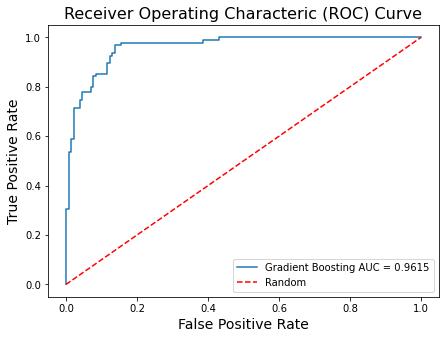

In [596]:
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label = 'Gradient Boosting AUC = ' + str(round(auc_gb, 4)))
plt.plot([0, 1], [0, 1],'r--', label = 'Random')
plt.title('Receiver Operating Characteric (ROC) Curve', size=16)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc=4)
plt.show()

In [ ]:
# bin_edges = [float('-inf'), 60, 75, 100, 120, float('inf')]
# bin_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']

In [ ]:
# filtered_df['Oxygen_Level_Binned'] = pd.cut(filtered_df['OxygenLevel'], bins=bin_edges, labels=bin_labels, right=False)

In [ ]:
# filtered_df.Oxygen_Level_Binned.value_counts()